In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import itertools
# import NOTEARS
import nt_linear as nt
from dag_generator import DAGGenerator
from sklearn.preprocessing import scale
import scipy
from scipy.stats import entropy
from matplotlib import animation
import seaborn as sns
import matplotlib as mpl

In [2]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

# Attacks
This notebook contains all possible attacks on 3-node variable systems using varsortability. 

## ToC
1. Chains
    - Revert Chain
    - Introduce Fork
    - Introduce Collider
2. Forks
    - Convert Fork to Chain
    - Change Fork's origin
    - Introduce Collider
3. Colliders
    - Convert Collider into Fork
    - Convert Collider into Chain
    - Change Collider's sink node

In [3]:
SAMPLE_SIZE = 100000
NODE_SIZE = 2000
ARROW_SIZE = 20
LINEWIDTH = 1

## 1. Chains

### Revert Chain

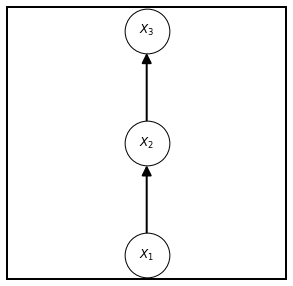

In [4]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
fig = plt.figure(figsize=(5, 5))
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

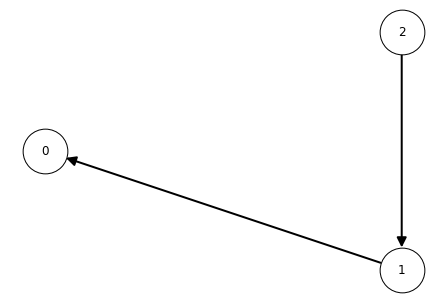

In [11]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T

gdata = scale(gdata)

gdata[:, 0] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Create Fork

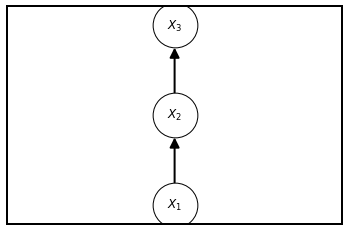

In [12]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

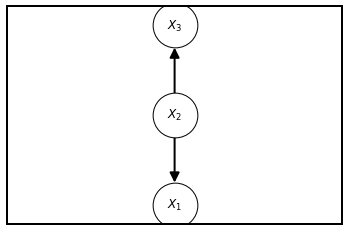

In [17]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 2
gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(nt_pred_nx, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

### Creating Collider

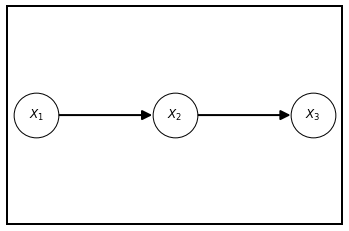

In [18]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (node, 1) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

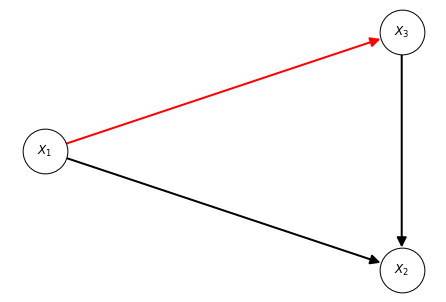

In [21]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
edge_colors = ['black' if edge != (0, 2) else 'red' for edge in nt_pred_nx.edges]
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, edge_color=edge_colors)

## 2. Forks

### Fork2Chain

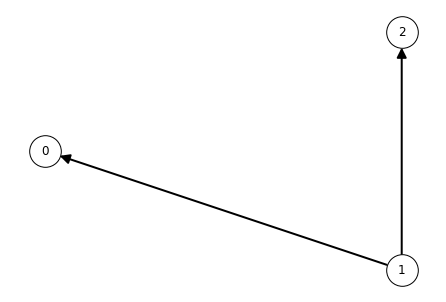

In [31]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

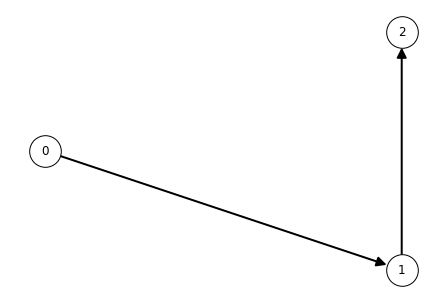

In [32]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Change Fork origin

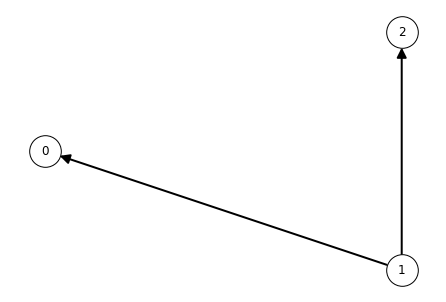

In [33]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

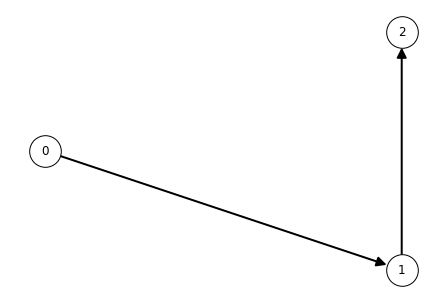

In [34]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2
gdata[:, 2] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Fork2Collider

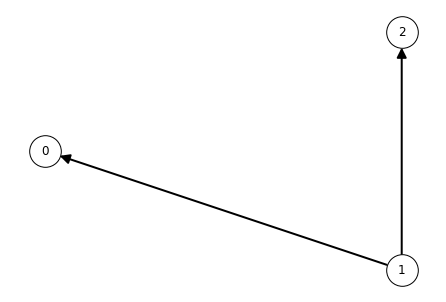

In [35]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

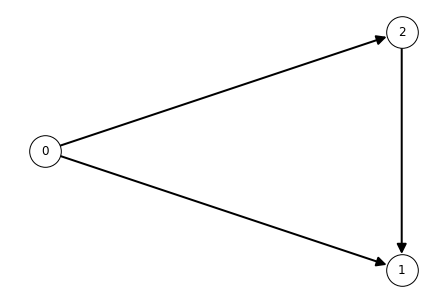

In [36]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

## Colliders

### Collider2Chain

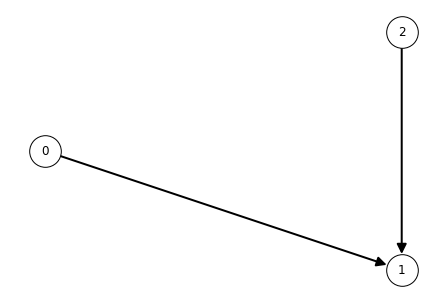

In [3]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

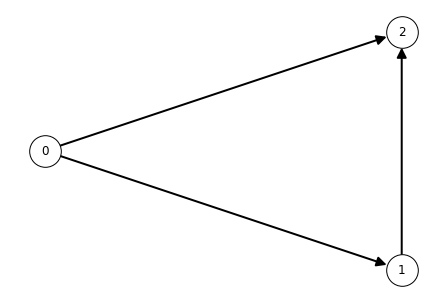

In [7]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Collider2Fork

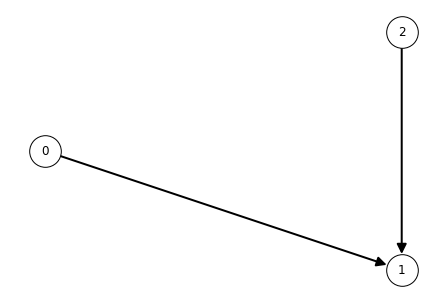

In [39]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

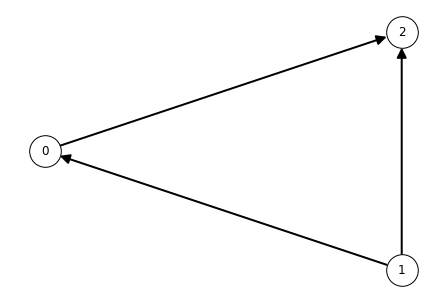

In [40]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 2
gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Change Collider sink node

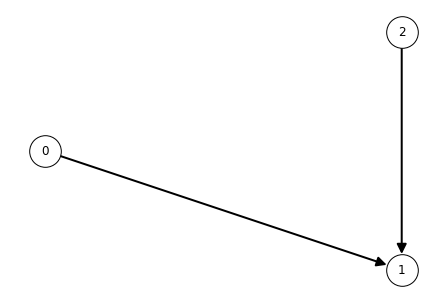

In [41]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

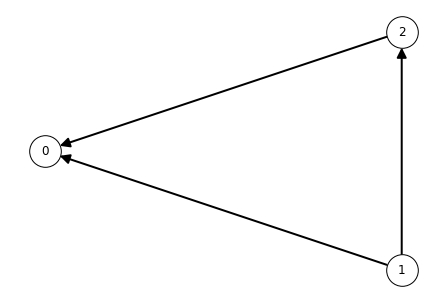

In [42]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [2]:
import pomegranate as pg

In [12]:
x = pg.DiscreteDistribution({'t': 0.1, 'f': 0.9})
y = pg.DiscreteDistribution({'t': 0.05, 'f': 0.95})
e = pg.DiscreteDistribution({'t': 0.05, 'f': 0.95})
s = pg.ConditionalProbabilityTable(
    [['f', 'f', 't', 0.6],
     ['f', 'f', 'f', 0.4],
     ['f', 't', 't', 0.7],
     ['f', 't', 'f', 0.3],
     ['t', 'f', 't', 0.8],
     ['t', 'f', 'f', 0.2],
     ['t', 't', 't', 0.95],
     ['t', 't', 'f', 0.05]], [x, y]
)
t = pg.ConditionalProbabilityTable(
    [['f', 'f', 't', 0.05],
     ['f', 'f', 'f', 0.95],
     ['f', 't', 't', 0.8],
     ['f', 't', 'f', 0.2],
     ['t', 'f', 't', 0.6],
     ['t', 'f', 'f', 0.4],
     ['t', 't', 't', 0.1],
     ['t', 't', 'f', 0.0]], [s, e]
)

X, Y, E, S, T = pg.Node(x, name='illness x'), pg.Node(y, name='illness y'), pg.Node(e, name='exposure'), pg.Node(s, name='symptoms'), pg.Node(t, name='treatment')
model = pg.BayesianNetwork('Network')
model.add_states(X, Y, E, S, T)
model.add_edge(X, S)
model.add_edge(Y, S)
model.add_edge(S, T)
model.add_edge(E, T)
model.bake()

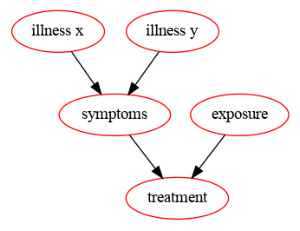

In [13]:
model.plot()

In [14]:
model.predict_proba([['t', 'f', None, None, None]])

[array(['t', 'f', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "t" : 0.014522821576763623,
                              "f" : 0.9854771784232363
                          }
                      ],
                      "frozen" : false
                  }                                      ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "f" : 0.20746887966805005,
                    "t" : 0.7925311203319501
                }
            ],
            "frozen" : false
        }                                     ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "p

In [15]:
data = model.sample(1000)

In [16]:
x = pg.DiscreteDistribution({'t': 0.1, 'f': 0.9})
y = pg.DiscreteDistribution({'t': 0.05, 'f': 0.95})
s = pg.ConditionalProbabilityTable(
    [['f', 'f', 't', 0.125],
     ['f', 'f', 'f', 0.125],
     ['f', 't', 't', 0.125],
     ['f', 't', 'f', 0.125],
     ['t', 'f', 't', 0.125],
     ['t', 'f', 'f', 0.125],
     ['t', 't', 't', 0.125],
     ['t', 't', 'f', 0.125]], [x, y]
)
t = pg.ConditionalProbabilityTable(
    [['f', 't', 0.25],
     ['f', 'f', 0.25],
     ['t', 't', 0.25],
     ['t', 'f', 0.25]], [s]
)
e = pg.ConditionalProbabilityTable(
    [['f', 'f', 't', 0.125],
     ['f', 'f', 'f', 0.125],
     ['f', 't', 't', 0.125],
     ['f', 't', 'f', 0.125],
     ['t', 'f', 't', 0.125],
     ['t', 'f', 'f', 0.125],
     ['t', 't', 't', 0.125],
     ['t', 't', 'f', 0.125]], [s, t]
)

X, Y, E, S, T = pg.Node(x, name='illness x'), pg.Node(y, name='illness y'), pg.Node(e, name='exposure'), pg.Node(s, name='symptoms'), pg.Node(t, name='treatment')
model = pg.BayesianNetwork('Network')
model.add_states(X, Y, E, S, T)
model.add_edge(X, S)
model.add_edge(Y, S)
model.add_edge(S, T)
model.add_edge(T, E)
model.add_edge(S, E)
model.bake()
model.fit(data)

{
    "class" : "BayesianNetwork",
    "name" : "Network",
    "structure" : [
        [],
        [],
        [
            3,
            4
        ],
        [
            0,
            1
        ],
        [
            3
        ]
    ],
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "t" : 0.083,
                        "f" : 0.917
                    }
                ],
                "frozen" : false
            },
            "name" : "illness x",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
   

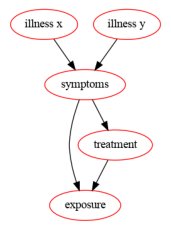

In [17]:
model.plot()

In [18]:
model.predict_proba([['t', 'f', None, None, None]])

[array(['t', 'f', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "f" : 0.9194658928304248,
                              "t" : 0.08053410716957525
                          }
                      ],
                      "frozen" : false
                  }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "f" : 0.21794871794871834,
                    "t" : 0.7820512820512817
                }
            ],
            "frozen" : false
        }                                     ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "para